<a href="https://colab.research.google.com/github/rexbrahh/Optimization-of-Machine-Learning-Models-for-Prediction-of-Personal-Loan-Default-Rate/blob/main/Homework_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Sheet 4



In this problem sheet, you are expected to apply the neural network to predict the price of sp500 by using indices of other important world economic entities. You will need to

- Get some experience on tensorflow
- Understand the interaction between different markets
- Implement some neural network models to predict


#### Suppose Bob is a speculator in the stock market, who would like to try a strategy based on several different world's principle entities' indices, and that

- Bob can only trade on sp500
- Bob will mainly take Japan, Germany, UK, France, and Hong Kong SAR of China as the main benchmark references.  
- Bob only consult the **closed price** of each day.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



### Question 1
Find out the principle index of US, Japan, Germany, UK, France, and Hong Kong SAR of China. For example,
* US: SP500
* Japan: ?
* Germany: ?
* UK: ?
* France: ?
* Hong Kong SAR of China: ?



In [ ]:
# Japan: Nikkei 225
# Germany: DAX
# UK: FTSE 100
# France: CAC 40
# Hong Kong SAR of China: HK50


### Question 2
- Import the indices' price datas as pandas Dataframe into your notebook, from the source dataset: https://www.kaggle.com/rohitktiwari04/top-10-stock-indices, name this data frame as "all indices".


In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [ ]:
import pandas as pd

df = pd.concat(map(pd.read_csv, ['SSE.csv', 'Nikkei 225.csv', 'Nifty50.csv', 'Nasdaq.csv', 'Kospi.csv', 'Hang Seng.csv', 'FTSE.csv', 'Dow Jones.csv', 'DAX.csv', 'CAC.csv']), ignore_index=True)

all_indices = pd.DataFrame(df)

all_indices

FileNotFoundError: ignored

In [ ]:
import os
import numpy as np
import pandas as pd

missing_col =['Open',"High","Low","Close","Adj Close", "Volume", "Open", "High","Low","Close"]

for i in missing_col:
    all_indices.loc[all_indices.loc[:,i].isnull(),i] = all_indices.loc[:,i].mean()

all_indices.dropna(axis='columns',how='any',thresh=None,subset=None, inplace=False)
all_indices.isnull().sum()


Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
 Open        30510
 High        30510
 Low         30510
 Close       30510
dtype: int64

### Question 3
- Extract the data for the above indices. For each day n, associate the logdiff, i.e., log P_{n}- log P_{n-1}, which can be seen as the increments. Here P_{n} is the price of day n.


In [ ]:
all_indices
cols = [0,4]
bob = all_indices[all_indices.columns[cols]]
bob

,Date,Close
0,2007-01-04,2715.718994
1,2007-01-05,2641.333984
2,2007-01-08,2707.198975
3,2007-01-09,2807.803955
4,2007-01-10,2825.575928
...,...,...
34157,2021-06-25,6622.870117
34158,2021-06-28,6558.020020
34159,2021-06-29,6567.430176
34160,2021-06-30,6507.830078


In [ ]:
import math

logdiff = [0]*bob.shape[0]
for i in range(1,bob.shape[0] ): #skip the first day
    logdiff[i] = math.log(bob.loc[i,'Close']) - math.log(bob.loc[i-1,'Close'])

bob.insert(2,"LogDiff",logdiff, True)
bob

,Date,Close,LogDiff
0,2007-01-04,2715.718994,0.000000
1,2007-01-05,2641.333984,-0.027773
2,2007-01-08,2707.198975,0.024630
3,2007-01-09,2807.803955,0.036488
4,2007-01-10,2825.575928,0.006310
...,...,...,...
34157,2021-06-25,6622.870117,-0.001249
34158,2021-06-28,6558.020020,-0.009840
34159,2021-06-29,6567.430176,0.001434
34160,2021-06-30,6507.830078,-0.009117


### Question 4
- Take the logdiff of US as the output value, and logdiffs of other 5 indices as input. Do some EDA.

In [ ]:
nasdaq = pd.read_csv('Nasdaq.csv')#SP500 data not found on the website, using nasdaq as the main principle instead
#dowj = pd.read_csv('Dow Jones.csv')
nikkei225 = pd.read_csv('Nikkei 225.csv')
dax = pd.read_csv('DAX.csv')
ftse = pd.read_csv('FTSE.csv')
cac = pd.read_csv('CAC.csv')
hs = pd.read_csv('Hang Seng.csv')

In [ ]:
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,2474.159912,2474.159912,2273.070068,2291.860107,2291.860107,1918930000
1,2001-01-03,2254.560059,2618.030029,2251.709961,2616.689941,2616.689941,3188000000
2,2001-01-04,2593.959961,2644.800049,2549.830078,2566.830078,2566.830078,2610680000
3,2001-01-05,2573.110107,2574.620117,2395.389893,2407.649902,2407.649902,2104670000
4,2001-01-08,2388.719971,2397.060059,2299.649902,2395.919922,2395.919922,1850590000


In [ ]:
nikkei225.head()

,Date,Close,Adj Close,Volume
0,2007-01-04,17353.669922,17353.669922,80100000.0
1,2007-01-05,17091.589844,17091.589844,158600000.0
2,2007-01-09,17237.769531,17237.769531,142400000.0
3,2007-01-10,16942.400391,16942.400391,133500000.0
4,2007-01-11,16838.169922,16838.169922,121900000.0


In [ ]:
dax.head()

,Date,Close,Adj Close,Volume
0,2007-01-02,6681.129883,6681.129883,70947800.0
1,2007-01-03,6691.319824,6691.319824,105913800.0
2,2007-01-04,6674.399902,6674.399902,143461600.0
3,2007-01-05,6593.089844,6593.089844,142562500.0
4,2007-01-08,6607.589844,6607.589844,116670200.0


In [ ]:
ftse.head()

,Date,Close,Adj Close,Volume
0,2020-04-24,5752.200195,5752.200195,8.088216e+08
1,2020-04-27,5846.799805,5846.799805,7.922464e+08
2,2020-04-28,5958.500000,5958.500000,1.196851e+09
3,2020-04-29,6115.299805,6115.299805,1.288097e+09
4,2020-04-30,5901.200195,5901.200195,1.933349e+09


In [ ]:
cac.head()

,Date,Close,Adj Close,Volume
0,2007-01-02,5617.709961,5617.709961,85910000.0
1,2007-01-03,5610.919922,5610.919922,118580700.0
2,2007-01-04,5574.560059,5574.560059,130465700.0
3,2007-01-05,5517.350098,5517.350098,126420500.0
4,2007-01-08,5518.589844,5518.589844,115053800.0


In [ ]:
hs.head()

,Date,Close,Adj Close,Volume
0,2007-01-02,20310.179688,20310.179688,1.264597e+09
1,2007-01-03,20413.390625,20413.390625,1.673969e+09
2,2007-01-04,20025.580078,20025.580078,2.130510e+09
3,2007-01-05,20211.279297,20211.279297,1.959114e+09
4,2007-01-08,20029.660156,20029.660156,1.438589e+09


In [ ]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157 entries, 0 to 5156
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5157 non-null   object 
 1   Open       5157 non-null   float64
 2   High       5157 non-null   float64
 3   Low        5157 non-null   float64
 4   Close      5157 non-null   float64
 5   Adj Close  5157 non-null   float64
 6   Volume     5157 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 282.1+ KB


In [ ]:
nasdaq.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000,5.157000e+03
mean,4029.621082,4055.696617,4000.662047,4030.125791,4030.125791,2.127413e+09
std,2830.319295,2846.730753,2811.136162,2830.968376,2830.968376,8.674994e+08
min,1116.760010,1135.890015,1108.489990,1114.109985,1114.109985,1.494100e+08
25%,2093.540039,2106.989990,2077.709961,2091.239990,2091.239990,1.716160e+09
50%,2683.379883,2699.870117,2663.639893,2686.199951,2686.199951,1.932080e+09
75%,5085.390137,5106.649902,5062.509766,5089.930176,5089.930176,2.215530e+09
max,14509.849609,14535.969727,14478.059570,14528.330078,14528.330078,1.110216e+10


In [ ]:
nikkei225.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3567 entries, 0 to 3566
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3567 non-null   object 
 1   Open       3544 non-null   float64
 2   High       3544 non-null   float64
 3   Low        3544 non-null   float64
 4   Close      3544 non-null   float64
 5   Adj Close  3544 non-null   float64
 6   Volume     3544 non-null   float64
dtypes: float64(6), object(1)
memory usage: 195.2+ KB


In [ ]:
nikkei225.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3.544000e+03
mean,16115.583779,16208.413907,16013.205832,16112.798268,16112.798268,1.280019e+08
std,5536.995793,5554.628102,5517.251511,5538.489448,5538.489448,5.326727e+07
min,7059.770020,7100.770020,6994.899902,7054.979980,7054.979980,0.000000e+00
25%,10329.109863,10377.750244,10268.262696,10331.362304,10331.362304,9.157500e+07
50%,16309.509765,16387.669922,16157.104981,16255.944824,16255.944824,1.253000e+08
75%,20432.004395,20507.564941,20331.571777,20420.873047,20420.873047,1.535000e+08
max,30366.820313,30714.519531,30191.650391,30467.750000,30467.750000,5.952000e+08


In [ ]:
dax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3676 non-null   object 
 1   Open       3671 non-null   float64
 2   High       3671 non-null   float64
 3   Low        3671 non-null   float64
 4   Close      3671 non-null   float64
 5   Adj Close  3671 non-null   float64
 6   Volume     3671 non-null   float64
dtypes: float64(6), object(1)
memory usage: 201.2+ KB


In [ ]:
dax.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3.671000e+03
mean,9221.936561,9284.463867,9152.741217,9220.883406,9220.883406,1.151953e+08
std,2826.973954,2832.379561,2820.755306,2826.696342,2826.696342,5.266268e+07
min,3677.070068,3706.320068,3588.889893,3666.409912,3666.409912,0.000000e+00
25%,6769.225098,6827.600098,6705.135010,6770.285157,6770.285157,8.038820e+07
50%,9295.320313,9351.870117,9214.179688,9290.070313,9290.070313,1.028354e+08
75%,11858.304688,11934.494629,11756.854981,11849.600098,11849.600098,1.366436e+08
max,15756.830078,15802.669922,15714.940430,15729.519531,15729.519531,4.940122e+08


In [ ]:
ftse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       300 non-null    object 
 1   Open       299 non-null    float64
 2   High       299 non-null    float64
 3   Low        299 non-null    float64
 4   Close      299 non-null    float64
 5   Adj Close  299 non-null    float64
 6   Volume     299 non-null    float64
dtypes: float64(6), object(1)
memory usage: 16.5+ KB


In [ ]:
ftse.describe()

,Open,High,Low,Close,Adj Close,Volume
count,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02
mean,6414.070902,6463.381284,6368.276591,6418.290634,6418.290634,8.172405e+08
std,422.379544,414.015767,430.054641,422.989788,422.989788,2.819533e+08
min,5577.299805,5593.399902,5525.500000,5577.299805,5577.299805,8.378200e+06
25%,6041.300049,6106.700195,5995.900147,6047.100098,6047.100098,6.546666e+08
50%,6384.700195,6432.399902,6325.200195,6385.200195,6385.200195,7.535316e+08
75%,6743.050049,6783.250000,6713.600098,6747.199951,6747.199951,9.397102e+08
max,7185.000000,7217.500000,7169.200195,7185.000000,7185.000000,2.246313e+09


In [ ]:
cac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3707 entries, 0 to 3706
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3707 non-null   object 
 1   Open       3704 non-null   float64
 2   High       3704 non-null   float64
 3   Low        3704 non-null   float64
 4   Close      3704 non-null   float64
 5   Adj Close  3704 non-null   float64
 6   Volume     3704 non-null   float64
dtypes: float64(6), object(1)
memory usage: 202.9+ KB


In [ ]:
cac.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3.704000e+03
mean,4530.158232,4560.569811,4495.711724,4529.114555,4529.114555,1.205472e+08
std,877.474895,875.662815,880.809183,878.387055,878.387055,5.280166e+07
min,2519.429932,2552.989990,2465.459961,2519.290039,2519.290039,0.000000e+00
25%,3823.049988,3849.637512,3790.457459,3819.099915,3819.099915,8.444900e+07
50%,4472.965088,4500.919922,4440.814941,4475.160157,4475.160157,1.125088e+08
75%,5281.509888,5305.980102,5253.407592,5277.039795,5277.039795,1.463491e+08
max,6657.520020,6687.290039,6634.450195,6666.259766,6666.259766,5.312476e+08


In [ ]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3579 entries, 0 to 3578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3579 non-null   object 
 1   Open       3564 non-null   float64
 2   High       3564 non-null   float64
 3   Low        3564 non-null   float64
 4   Close      3564 non-null   float64
 5   Adj Close  3564 non-null   float64
 6   Volume     3564 non-null   float64
dtypes: float64(6), object(1)
memory usage: 195.9+ KB


In [ ]:
hs.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3.564000e+03
mean,23423.723620,23563.668748,23249.725545,23409.385158,23409.385158,1.896302e+09
std,3735.991605,3737.689861,3726.523453,3731.134236,3731.134236,7.665143e+08
min,11154.570313,11747.110352,10676.290039,11015.839844,11015.839844,0.000000e+00
25%,21067.764649,21174.579590,20913.770508,21055.772461,21055.772461,1.409613e+09
50%,23130.819336,23261.849610,22974.719726,23127.120118,23127.120118,1.724638e+09
75%,26042.047852,26192.059082,25854.319824,26044.910644,26044.910644,2.171941e+09
max,33335.480469,33484.078125,32897.039063,33154.121094,33154.121094,9.799120e+09


In [ ]:
nasdaq.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
nikkei225.isnull().sum()

Date          0
Open         23
High         23
Low          23
Close        23
Adj Close    23
Volume       23
dtype: int64

In [ ]:
list = ['Close','Adj Close','Volume']
for i in list:
    nikkei225[i].fillna(nikkei225[i].mean(),inplace=True)
nikkei225 = nikkei225.drop(['Open','High','Low'],axis=1)
nikkei225.isnull().sum()

Date         0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
dax.isnull().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

In [ ]:
list = ['Close','Adj Close','Volume']
for i in list:
    dax[i].fillna(dax[i].mean(),inplace=True)
dax = dax.drop(['Open','High','Low'],axis=1)
dax.isnull().sum()

Date         0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
ftse.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
list = ['Close','Adj Close','Volume']
for i in list:
    ftse[i].fillna(ftse[i].mean(),inplace=True)
ftse = ftse.drop(['Open','High','Low'],axis=1)
ftse.isnull().sum()

Date         0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
cac.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [ ]:
list = ['Close','Adj Close','Volume']
for i in list:
    cac[i].fillna(cac[i].mean(),inplace=True)
cac = cac.drop(['Open','High','Low'],axis=1)
cac.isnull().sum()

Date         0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
hs.isnull().sum()

Date          0
Open         15
High         15
Low          15
Close        15
Adj Close    15
Volume       15
dtype: int64

In [ ]:
list = ['Close','Adj Close','Volume']
for i in list:
    hs[i].fillna(hs[i].mean(),inplace=True)
hs = hs.drop(['Open','High','Low'],axis=1)
hs.isnull().sum()

Date         0
Close        0
Adj Close    0
Volume       0
dtype: int64

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<AxesSubplot:xlabel='Date', ylabel='Close'>

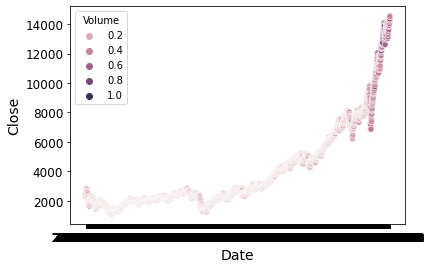

In [ ]:
import seaborn as sns

sns.scatterplot(x="Date", y="Close",hue='Volume', data=nasdaq)

/Users/rexliu/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Volume'>

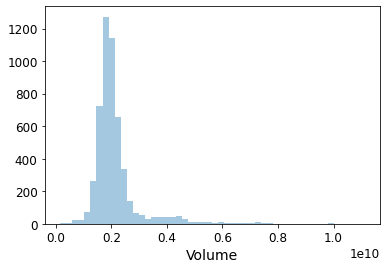

In [ ]:
sns.distplot(nasdaq['Volume'],kde=False)#i don't care if it'll be removed in the future :/

<AxesSubplot:xlabel='Volume', ylabel='Close'>

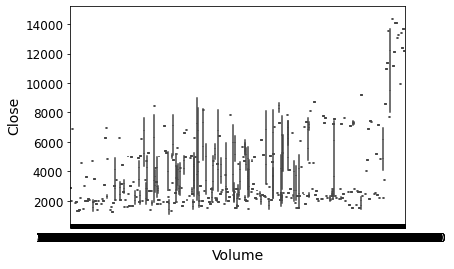

In [ ]:
sns.boxplot(x='Volume',y='Close',data=nasdaq)

<AxesSubplot:>

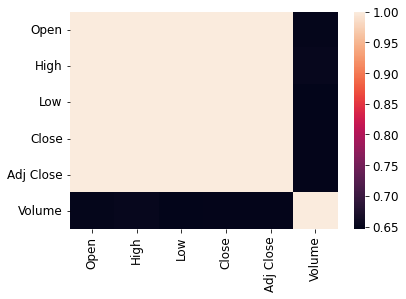

In [ ]:
sns.heatmap(nasdaq.corr(), fmt=".2f")

In [ ]:
#okay...i kinda just wanna skip the rest of these six datasets...

### Question 5

Construct a MLP with only 1 hidden layer(with 100 neurons). Train the model with 30 epochs, report the result. Compare the performance on the training set and validation set, conclude that
- whether the result is improving with more epochs
- whether there exists overfitting


In [ ]:
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,2474.159912,2474.159912,2273.070068,2291.860107,2291.860107,1918930000
1,2001-01-03,2254.560059,2618.030029,2251.709961,2616.689941,2616.689941,3188000000
2,2001-01-04,2593.959961,2644.800049,2549.830078,2566.830078,2566.830078,2610680000
3,2001-01-05,2573.110107,2574.620117,2395.389893,2407.649902,2407.649902,2104670000
4,2001-01-08,2388.719971,2397.060059,2299.649902,2395.919922,2395.919922,1850590000


In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron

X = nasdaq.drop(['Open','High','Low','Adj Close','Volume'], axis=1)
y = nasdaq['Volume']

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

NameError: ignored

### Question 6

Construct a MLP with 5 hidden layers (you decide how many neurons to put in each layer). Check the number of parameter to estimate, and print the model summary. Train your model. Save this as "my_keras_model_for_finance.h5".  Compare it with the result given by model in Question 5.

#### Suppose Bob has changed his strategy and  would like to predict the sp500 price only based on its 30 days historical average logdiff (which you know how to calculate, as is similar to the previous homework)

### Question 7

Construct either a stacking LSTM model or a GRU model, and train it. Report the results. (you might want to consult the textbook chapter 15, page 514-520)